# Create visualizations and geotiffs for beetle multi-disturbances

In [1]:
# Import packages
import os
import earthpy as et
from os import path
import earthpy.plot as ep
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import gc

# Set directories
home = path.join(et.io.HOME, "GitHub", "visualize-forest-disturbance")

input_folder = path.join(home, "data", "input")

output_folder = path.join(home, "data", "output", "output_tifs")

forest_folder = path.join(input_folder, "forest-disturbance-stack", "western-conus")

In [2]:
# Create path for beetle data
beetle_int_path = path.join(output_folder, 'beetle_stack.tif')

with rio.open(beetle_int_path) as src:
    print(src.dtypes)

('uint8',)


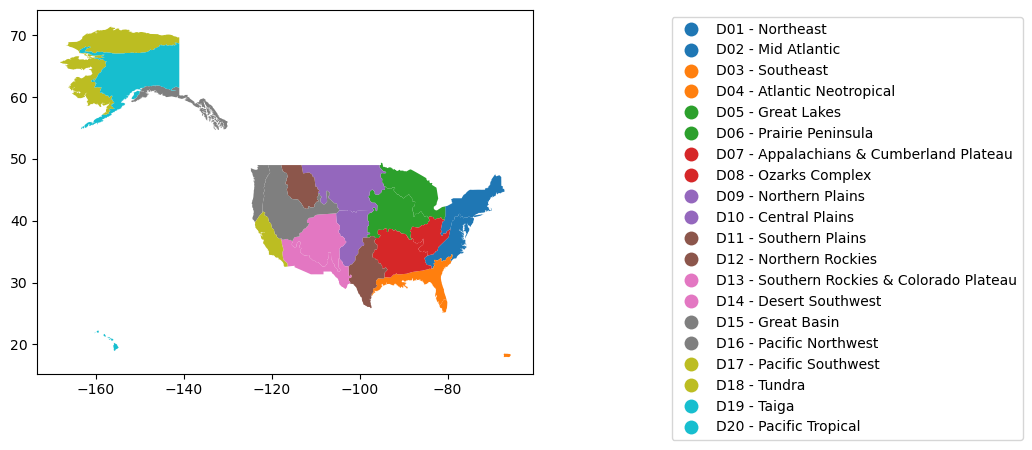

In [3]:
neon_domains = gpd.read_file(path.join(input_folder, "neon-domains", "Polygons-polygon.shp"))
fig, ax = plt.subplots()
neon_domains.plot(column="Name", legend=True, ax=ax)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))

<Axes: >

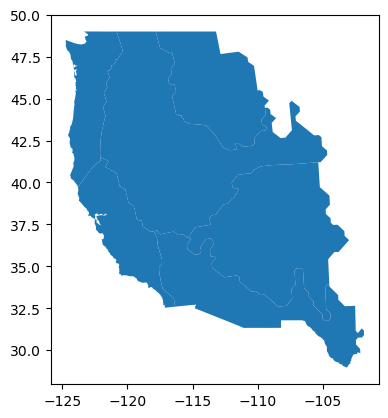

In [4]:
western_forests_domains = ['D12 - Northern Rockies', 
                           'D13 - Southern Rockies & Colorado Plateau', 
                           'D14 - Desert Southwest',
                           'D15 - Great Basin', 
                           'D16 - Pacific Northwest', 
                           'D17 - Pacific Southwest']

western_neon = neon_domains[neon_domains['Name'].isin(western_forests_domains)].clip([-130, 28.97026262, -101.84943552, 50])

western_neon.plot()

In [5]:
with rio.open(beetle_int_path) as src:
    beetle_crs = src.crs
    beetle_array = src.read(1)
    beetle_extent = plotting_extent(src)
    beetle_meta = src.profile
    beetle_transform = src.transform
    
beetle_array[beetle_array == 255] = 0

western_neon_reproj = western_neon.to_crs(beetle_crs)

In [6]:
YlOrRd_fso1 = mpl.colormaps['YlOrRd'].resampled(2)
newcolors_fso1 = YlOrRd_fso1(np.linspace(0, 1, 2))
white = np.array([0, 0, 0, 0])
newcolors_fso1[:1, :] = white
groups_fso1 = ["Beetle kill events not present", "Beetle kill events present"]
classes_fso1=[0, 1]
newcmp_fso1 = ListedColormap(newcolors_fso1)
beetle_sum_over_1 = beetle_array.copy()
beetle_sum_over_1[beetle_sum_over_1 > 0] = 1

In [7]:
beetle_sum_over_1_area = (beetle_sum_over_1.sum() * 30 * 30)/1000000
print("Total area that experienced one beetle kill event: {} sq km".format(beetle_sum_over_1_area))

Total area that experienced one beetle kill event: 30990.3381 sq km


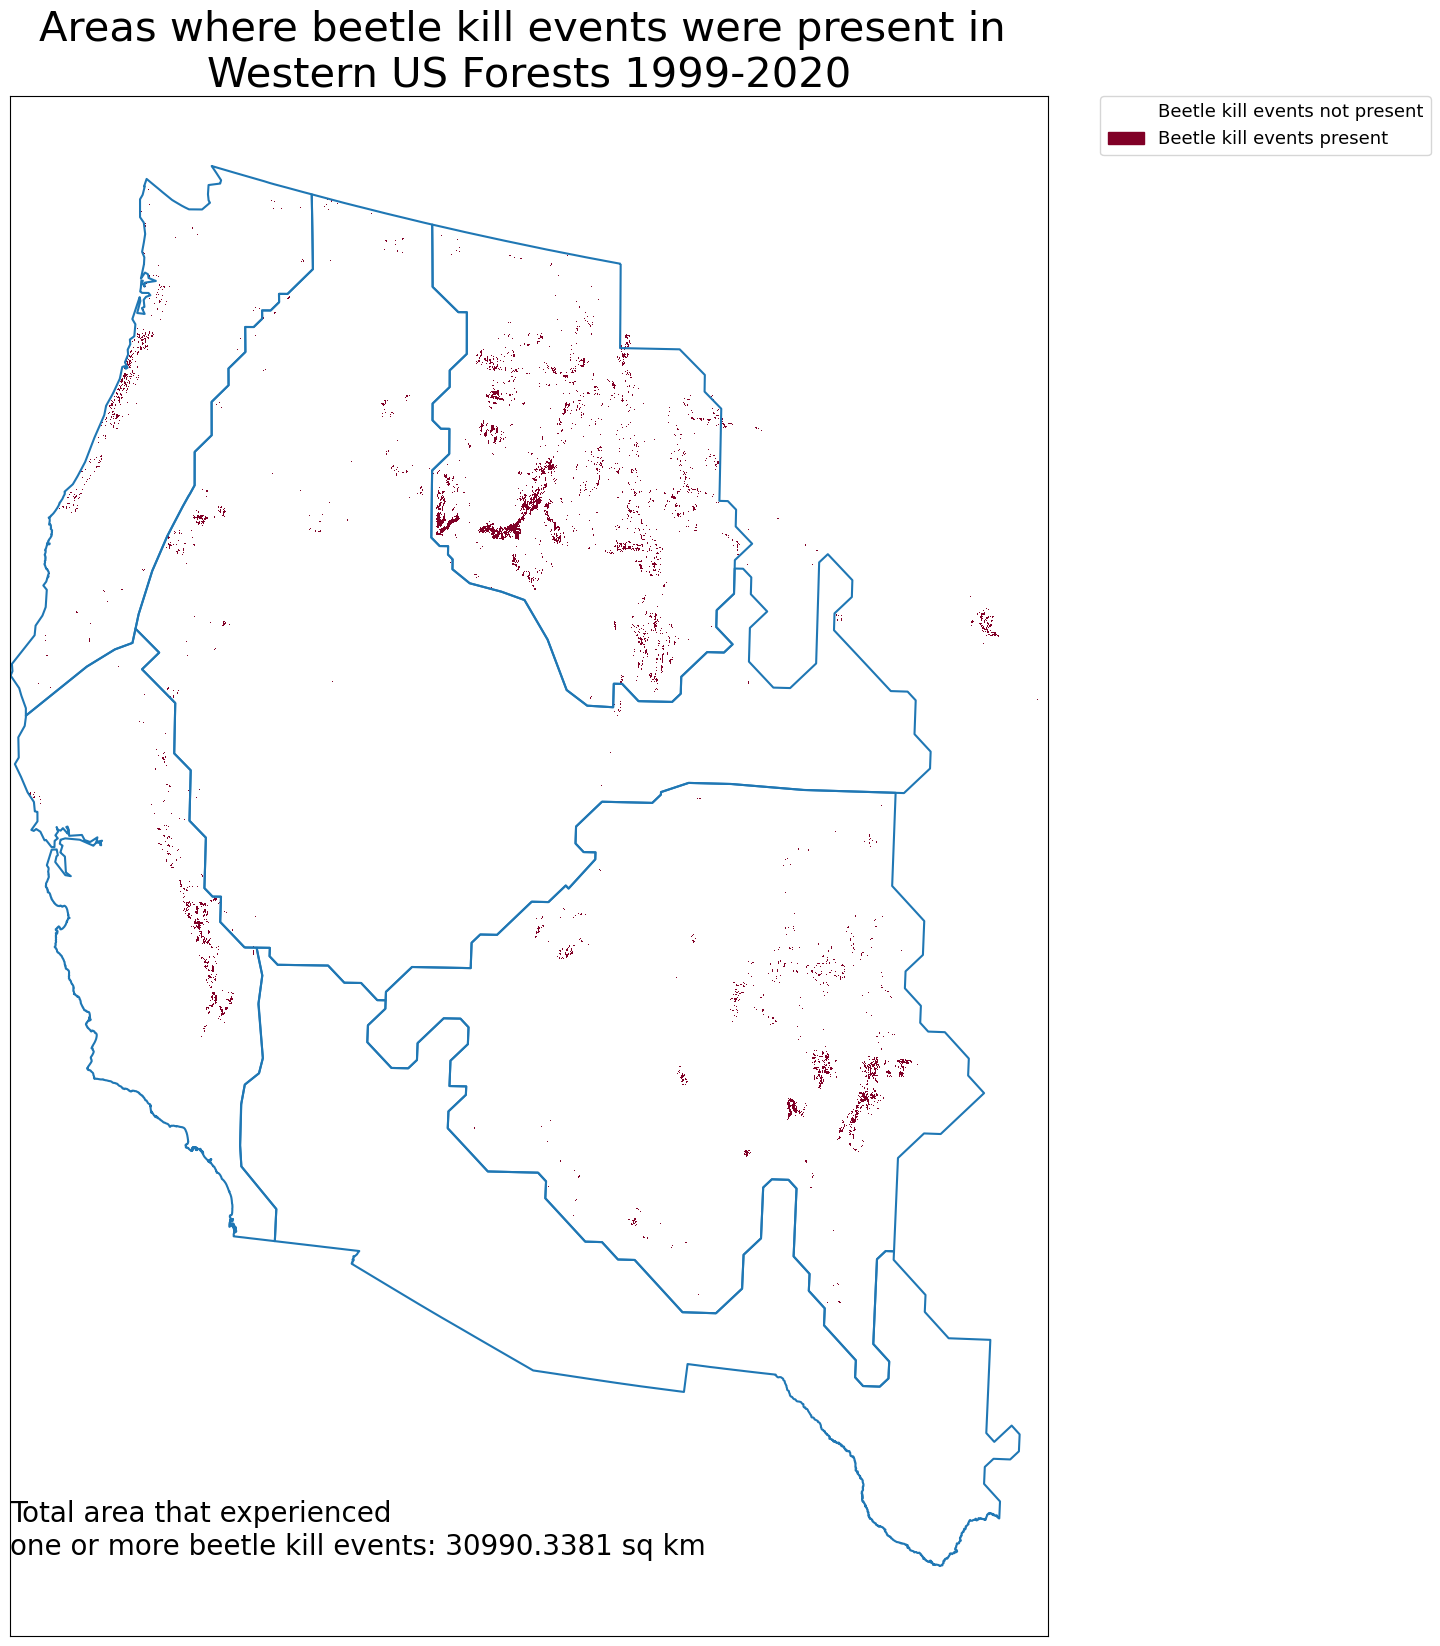

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(beetle_sum_over_1,
              ax=ax,
              extent=beetle_extent, 
              cmap=newcmp_fso1, 
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso1)

ax.annotate("Total area that experienced \none or more beetle kill events: {} sq km".format(beetle_sum_over_1_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where beetle kill events were present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areawith1beetle.png"))
plt.show()

In [9]:
beetle_sum_over_2 = beetle_array.copy()
beetle_sum_over_2[beetle_sum_over_2 <= 1] = 0
beetle_sum_over_2[beetle_sum_over_2 > 1] = 1
groups_fso2 = ["Less than 2 beetle kill events present", "2 or more beetle kill events present"]

In [10]:
beetle_sum_over_2_area = (beetle_sum_over_2.sum() * 30 * 30)/1000000
print("Total area that experienced two or more beetles: {} sq km".format(beetle_sum_over_2_area))

Total area that experienced two or more beetles: 5547.591 sq km


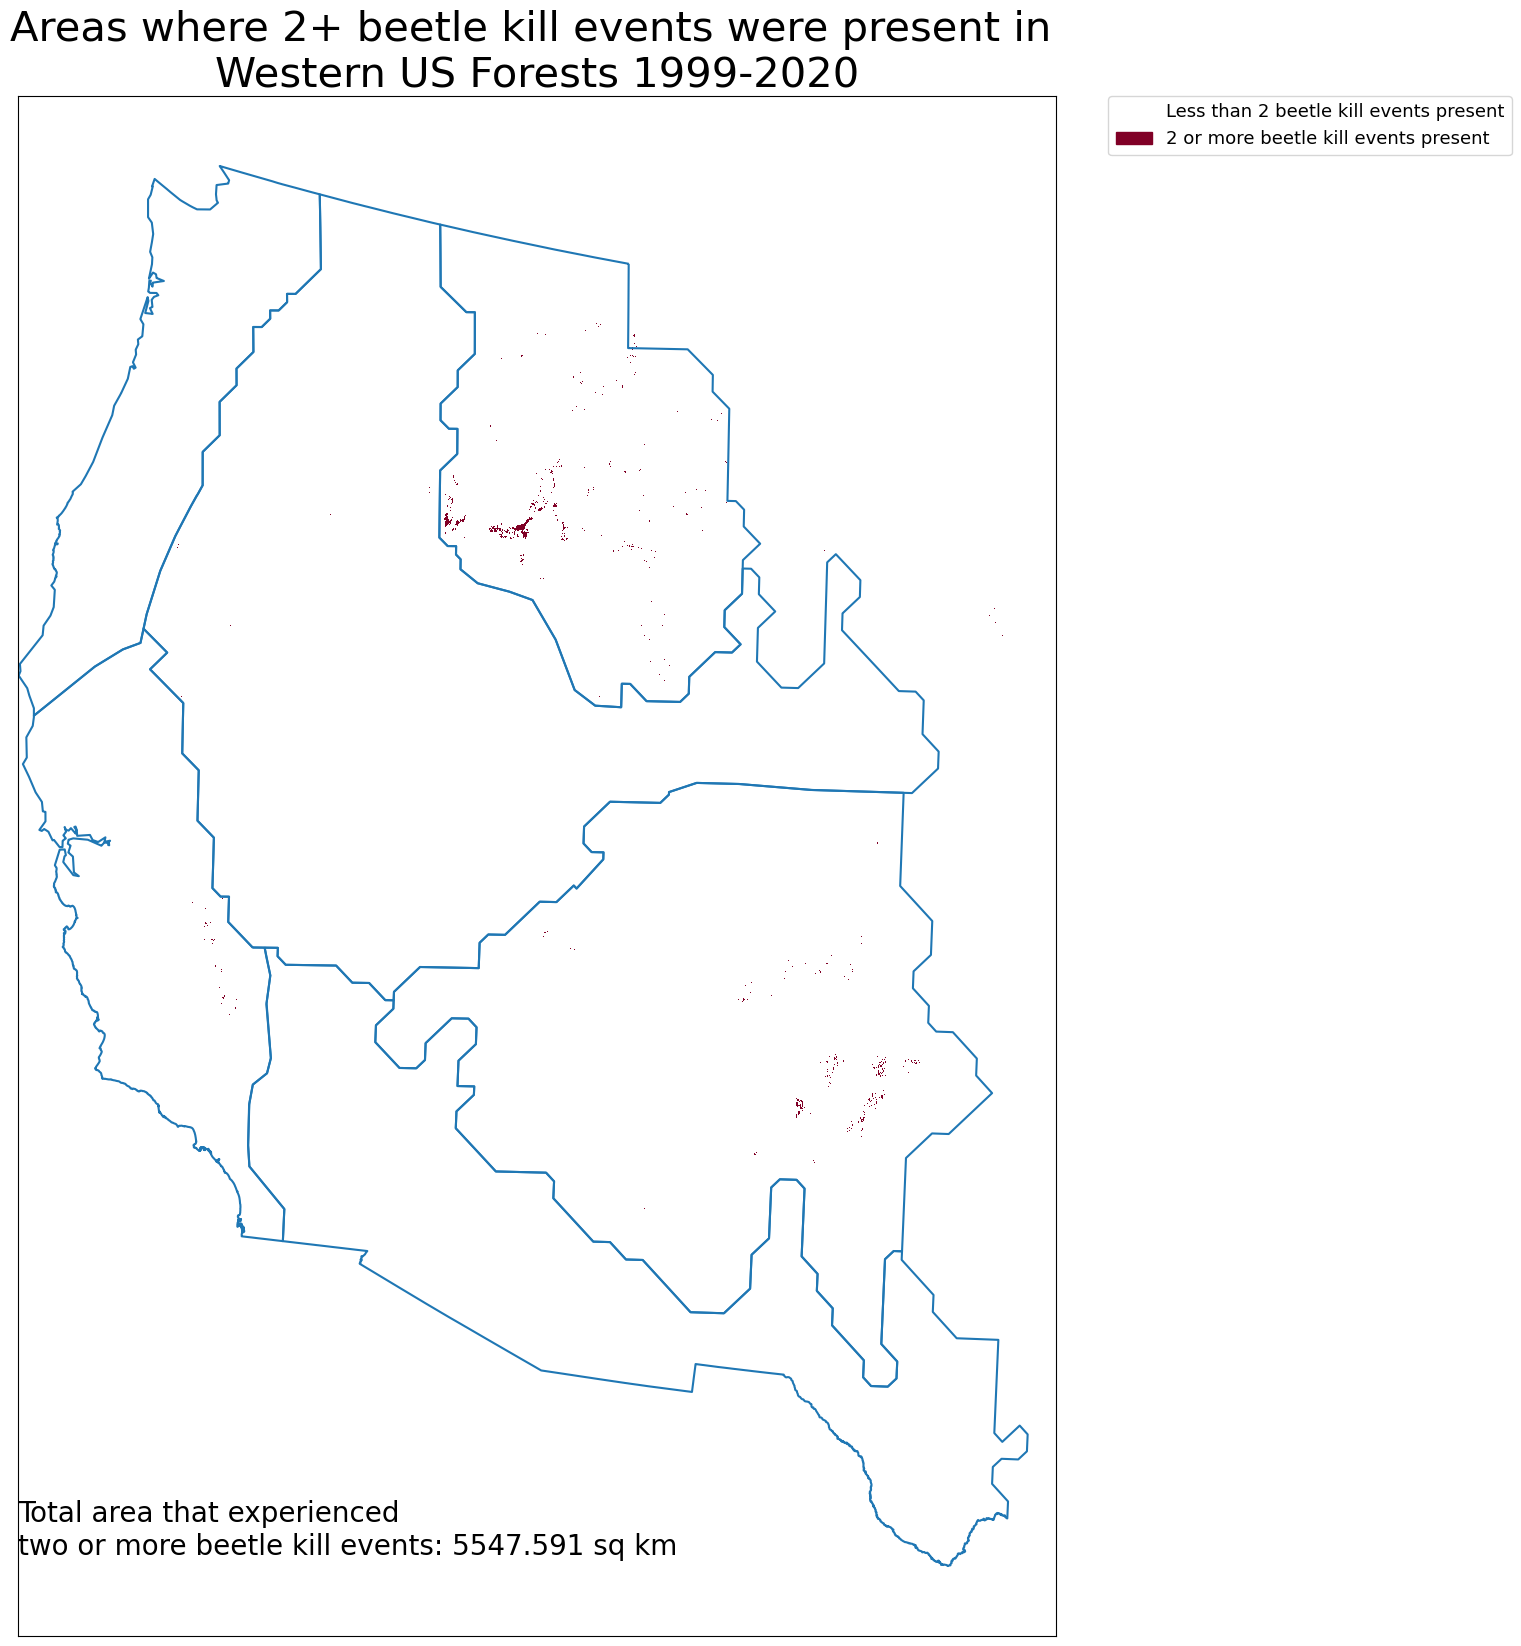

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(beetle_sum_over_2,
              ax=ax,
              extent=beetle_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso2)

ax.annotate("Total area that experienced \ntwo or more beetle kill events: {} sq km".format(beetle_sum_over_2_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where 2+ beetle kill events were present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith2beetles.png"))
plt.show()

In [12]:
beetle_sum_over_3 = beetle_array.copy()
beetle_sum_over_3[beetle_sum_over_3 <= 2] = 0
beetle_sum_over_3[beetle_sum_over_3 > 2] = 1
groups_fso3 = ["Less than 3 beetles present", "3 or more beetles present"]

In [13]:
beetle_sum_over_3_area = (beetle_sum_over_3.sum() * 30 * 30)/1000000
print("Total area that experienced three or more beetle kill events: {} sq km".format(beetle_sum_over_3_area))

Total area that experienced three or more beetle kill events: 1344.8241 sq km


In [14]:
gc.collect()

2569

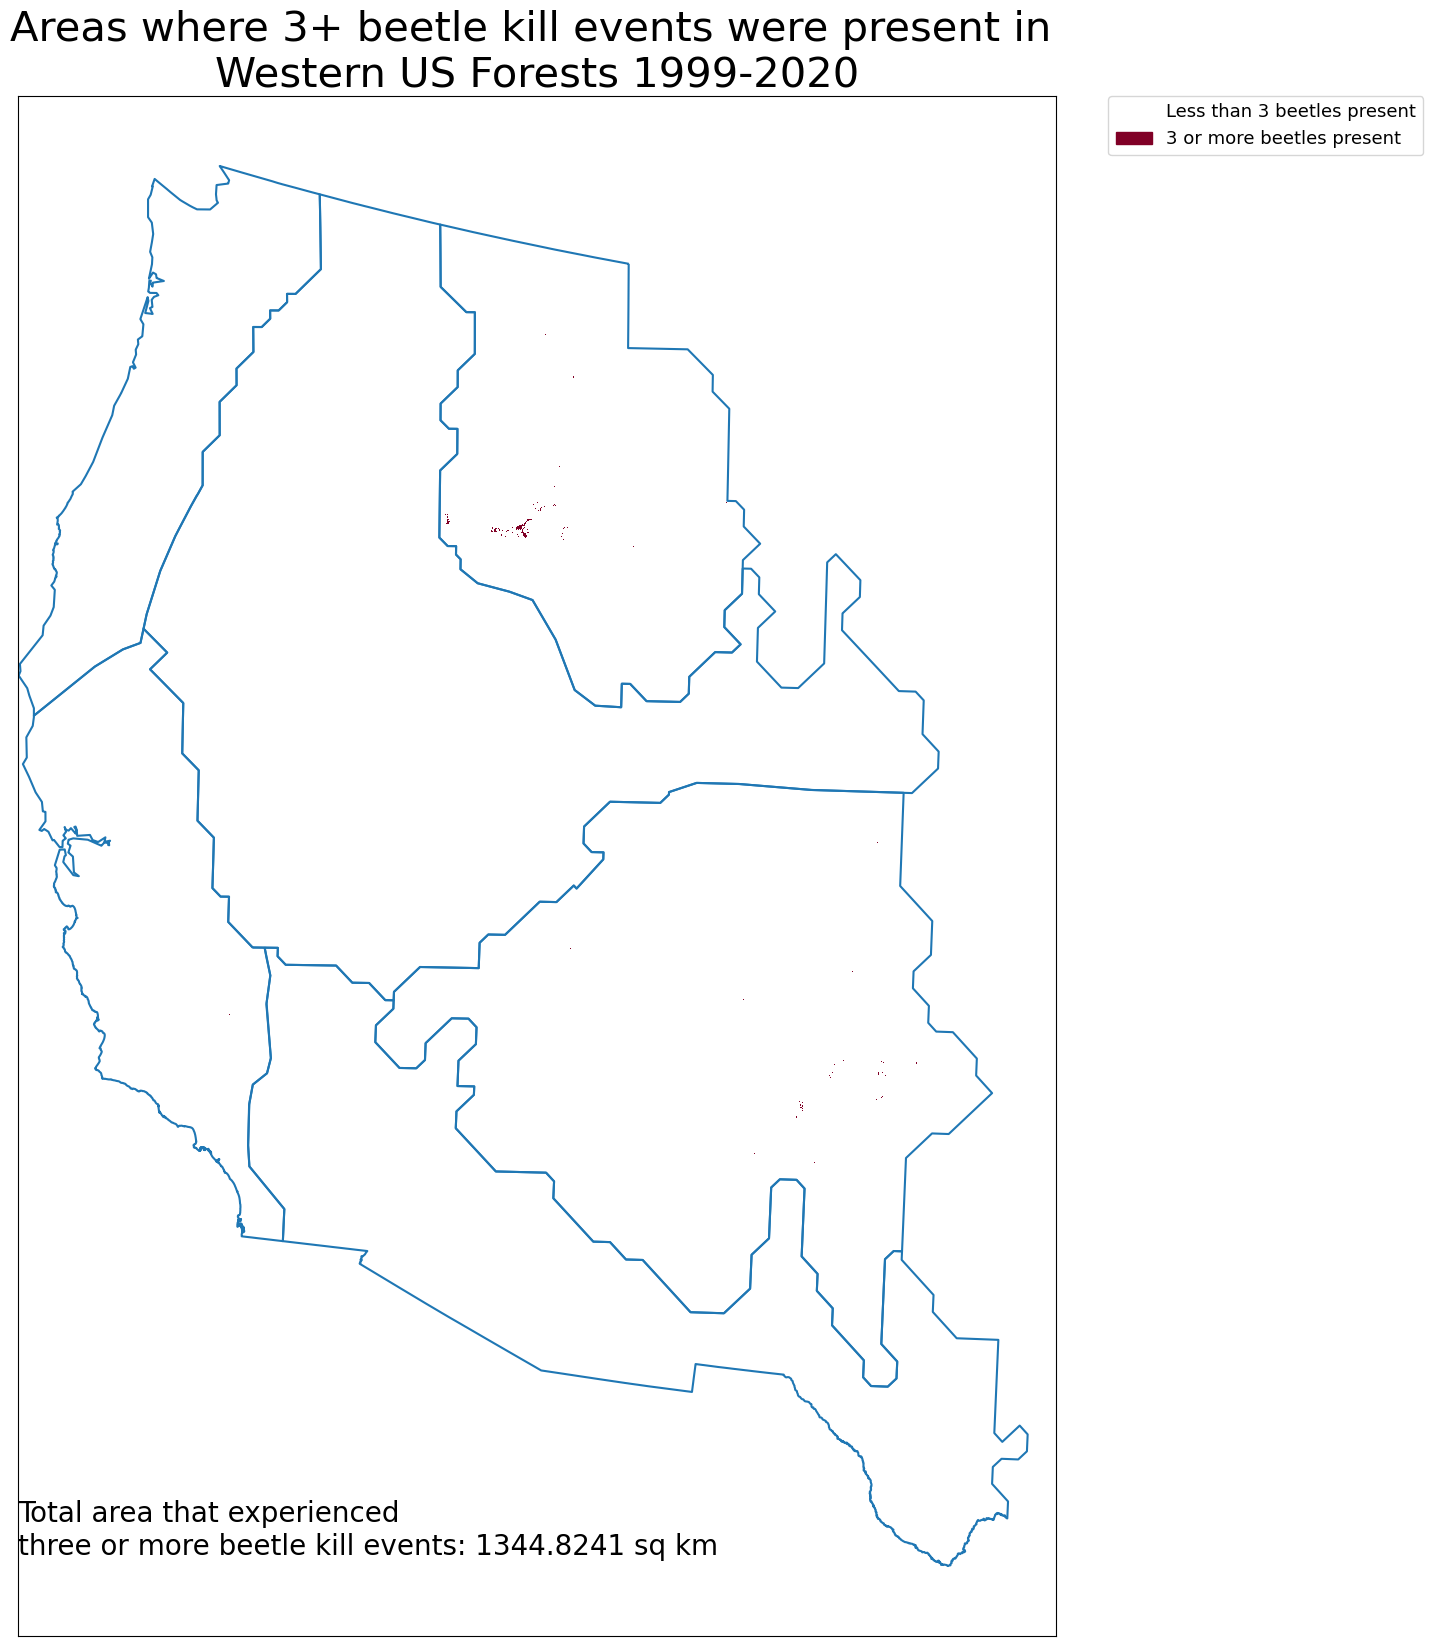

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(beetle_sum_over_3,
              ax=ax,
              extent=beetle_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso3)

ax.set_title(label="Areas where 3+ beetle kill events were present in \nWestern US Forests 1999-2020", size=30)

ax.annotate("Total area that experienced \nthree or more beetle kill events: {} sq km".format(beetle_sum_over_3_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)


western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith3beetles.png"))
plt.show()

In [16]:
beetle_sum_over_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
with rio.open('beetle_sum_over1.tif', 'w', **beetle_meta) as dst:
    dst.write(beetle_sum_over_1, 1)
with rio.open('beetle_sum_over2.tif', 'w', **beetle_meta) as dst:
    dst.write(beetle_sum_over_2, 1)
with rio.open('beetle_sum_over3.tif', 'w', **beetle_meta) as dst:
    dst.write(beetle_sum_over_3, 1)